# 1. Giới thiệu

* OG - Lượng đường trước khi lên men
* FG - Lượng đường sau khi lên men
* ABV - Tỷ lệ phần trăm của thức uống là rượu. Điều này phụ thuộc vào lượng đường đã được lên men.
* IBU - Vị đắng của hoa bia
* Color - Đo theo thang [Lovibond scale](http://brewwiki.com/index.php/Lovibond)

---------------------------------------------------------------

## a. Khai báo thư viện

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
pd.options.display.max_columns = 30

# 2. Load và xem dữ liệu

In [9]:
df = pd.read_csv('../Data/Beer/07_beerRecipeData.csv',  encoding = 'latin1')
df.head()

BeerID                             Name  \
0       1                Vanilla Cream Ale   
1       2      Southern Tier Pumking clone   
2       3      Zombie Dust Clone - EXTRACT   
3       4    Zombie Dust Clone - ALL GRAIN   
4       5  Bakke Brygg Belgisk Blonde 50 l   

                                                 URL  \
0       /homebrew/recipe/view/1633/vanilla-cream-ale   
1  /homebrew/recipe/view/16367/southern-tier-pumk...   
2  /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3  /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4  /homebrew/recipe/view/89534/bakke-brygg-belgis...   

                                Style  StyleID  Size(L)     OG     FG   ABV  \
0                           Cream Ale       45    21.77  1.055  1.013  5.48   
1  Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021  8.16   
2                        American IPA        7    18.93  1.063  1.018  5.91   
3                        American IPA        7    22.71  1.061  1.017  5.80   
4                   Belgian Blond Ale       20    50.00  1.060  1.010  6.48   

     IBU  Color  BoilSize  BoilTime  BoilGravity  Efficiency  MashThickness  \
0  17.65   4.83     28.39        75        1.038        70.0            NaN   
1  60.65  15.64     24.61        60        1.070        70.0            NaN   
2  59.25   8.98     22.71        60          NaN        70.0            NaN   
3  54.48   8.50     26.50        60          NaN        70.0            NaN   
4  17.84   4.57     60.00        90        1.050        72.0            NaN   

         SugarScale BrewMethod  PitchRate  PrimaryTemp PrimingMethod  \
0  Specific Gravity  All Grain        NaN        17.78    corn sugar   
1  Specific Gravity  All Grain        NaN          NaN           NaN   
2  Specific Gravity    extract        NaN          NaN           NaN   
3  Specific Gravity  All Grain        NaN          NaN           NaN   
4  Specific Gravity  All Grain        NaN        19.00    Sukkerlake   

    PrimingAmount   UserId  
0          4.5 oz    116.0  
1             NaN    955.0  
2             NaN      NaN  
3             NaN      NaN  
4  6-7 g sukker/l  18325.0

**Đếm số lượng dữ liệu tổng và lượng dữ liệu ở cột Style**

In [23]:
df.describe()

BeerID       StyleID       Size(L)            OG            FG  \
count  73265.000000  73265.000000  73265.000000  73265.000000  73265.000000   
mean   36985.240893     59.766014     43.993447      1.406331      1.075666   
std    21310.824434     56.856106    180.515312      2.198052      0.425388   
min        1.000000      1.000000      1.000000      1.000000     -0.003000   
25%    18581.000000     10.000000     18.930000      1.051000      1.011000   
50%    37018.000000     34.000000     20.820000      1.058000      1.013000   
75%    55428.000000    109.000000     23.660000      1.069000      1.017000   
max    73861.000000    176.000000   9200.000000     34.034500     10.341400   

                ABV           IBU         Color      BoilSize      BoilTime  \
count  73265.000000  73265.000000  73265.000000  73265.000000  73265.000000   
mean       6.138439     44.380476     13.403860     49.800072     65.096922   
std        1.874083     41.606932     11.935452    193.310638     15.011683   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%        5.080000     23.490000      5.170000     20.820000     60.000000   
50%        5.790000     35.870000      8.440000     27.440000     60.000000   
75%        6.830000     56.490000     16.780000     30.000000     60.000000   
max       54.720000   3409.300000    186.000000   9700.000000    240.000000   

        BoilGravity    Efficiency  MashThickness     PitchRate   PrimaryTemp  \
count  70517.000000  73265.000000   43773.000000  34488.000000  50969.000000   
mean       1.352646     66.335034       2.124709      0.750452     19.177332   
std        1.926144     14.095789       1.677661      0.394195      4.217123   
min        0.000000      0.000000       0.000000      0.000000    -17.780000   
25%        1.040000     65.000000       1.500000      0.350000     18.000000   
50%        1.047000     70.000000       1.500000      0.750000     20.000000   
75%        1.060000     75.000000       3.000000      1.000000     20.000000   
max       52.600000    100.000000     100.000000      2.000000    114.000000   

              UserId  
count   23253.000000  
mean    43060.109878  
std     27720.308739  
min        49.000000  
25%     20984.000000  
50%     42902.000000  
75%     57794.000000  
max    134362.000000

In [10]:
print('Data set shape:{}'.format(df.shape))
print('Unique styles:{}'.format(df['Style'].nunique()))

Data set shape:(73861, 23)
Unique styles:175


In [25]:
df.isna().sum()

BeerID               0
Name                 1
URL                  0
Style                0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2748
Efficiency           0
MashThickness    29492
SugarScale           0
BrewMethod           0
PitchRate        38777
PrimaryTemp      22296
PrimingMethod    66521
PrimingAmount    68511
UserId           50012
dtype: int64

In [56]:
df = df[df['FG']>=0]

## a. Giá trị missing

**Biểu đồ thể hiện giá trị missing**

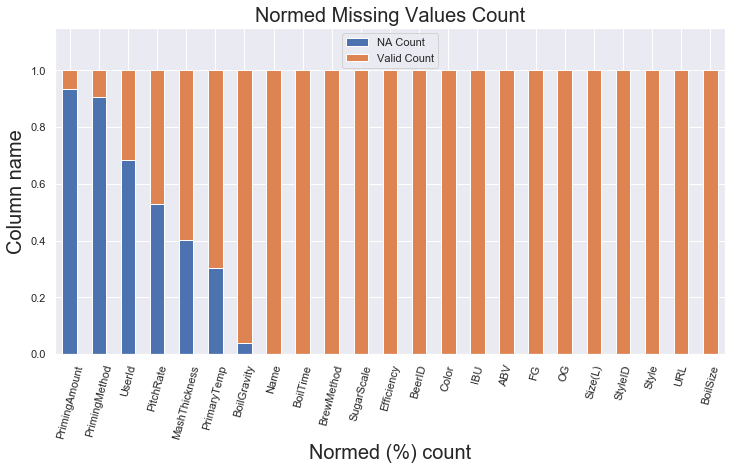

In [57]:
df_missing = df.copy()
df_missing = df_missing.T
true = df_missing.isnull().sum(axis = 1)
false = (len(df_missing.columns) - true)
df_missing['Valid Count'] = false / len(df_missing.columns)
df_missing['NA Count'] = true / len(df_missing.columns)

df_missing[['NA Count', 'Valid Count']].sort_values('NA Count', ascending=False).plot(kind = 'bar', stacked = True, figsize = (12,6))

#theme
plt.legend(loc = 9)
plt.ylim(0, 1.15)
plt.title('Normed Missing Values Count', fontsize = 20)
plt.xlabel('Normed (%) count', fontsize=20)
plt.ylabel('Column name', fontsize=20)
plt.xticks(rotation=75)
plt.show()

**Có 7 cột bị khuyết giá trị**

*15 Cột* **không bị khuyết giá trị** *=> Tuyệt vời để phân tích*

**Có 2 cột (*PrimingAmount, PrimingMethod*) bị khuyết tới gần 90% giá trị**

# 3. Những Style phổ biến nhất

**Loại bỏ các giá trị null ở cột Style**

In [58]:
df = df[pd.notnull(df['Style'])]

## a. Phong cách bia tự chế phổ biến nhất, theo công thức bia là gì?

**% số lượng bia(BeerID) theo từng phong cách(Style)**

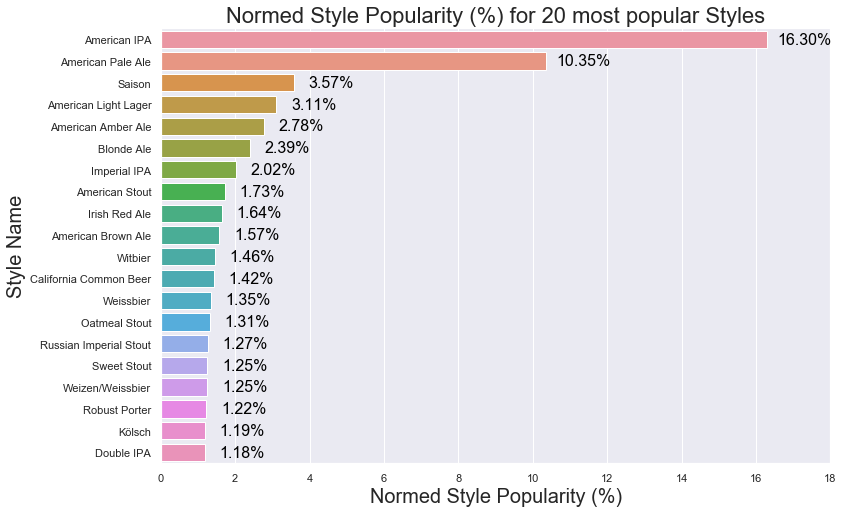

In [59]:
gb_style = df.groupby(['Style']).count().sort_values(['BeerID'], ascending=False).reset_index()[:20]
gb_style['BeerID'] = (gb_style['BeerID'] / len(df)) * 100

plt.figure(figsize=(12,8))
g = sns.barplot(x=gb_style['BeerID'], y=gb_style['Style'], orient='h')
plt.title('Normed Style Popularity (%) for 20 most popular Styles', fontsize=22)
plt.ylabel('Style Name', fontsize=20)
plt.xlabel('Normed Style Popularity (%)', fontsize=20)

plt.xlim(0,18)

for index, row in gb_style.iterrows():
    g.text(y=index+0.2,x=row['BeerID']+1,s='{:.2f}%'.format(row['BeerID']),
           color='black', ha="center", fontsize=16)

plt.show()

Ta có thể thấy có 2 phong cách trên 10% là: **American IPA(~16%)** và **American Pale Ale(~10%)**

## b. Phong cách chung phổ biến nhất?

**Phong cách chung có những loại nào?**

**Phân loại lại và vẽ biểu đồ**

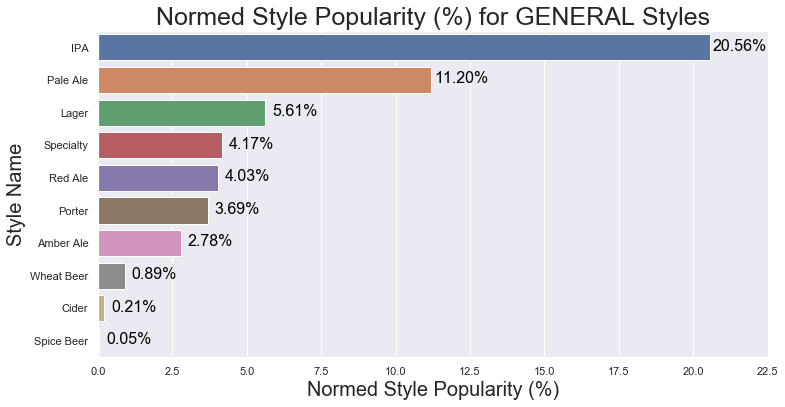

In [60]:
general_styles = ['Amber Ale','Pale Ale','Red Ale','Cider','Spice Beer',
                  'IPA','Lager','Specialty','Porter','Wheat Beer']
general_styles_dict = {'Brown':'Red','Fruit':'Spice', 'Stout':'Porter'}

df_general_styles = df.copy()
df_general_styles['Style_aux'] = 'Other'
for style in general_styles:
    df_general_styles.loc[df_general_styles['Style'].str.contains(style), 'Style_aux'] = style
for key in general_styles_dict:
    df_general_styles.loc[df_general_styles['Style'].str.contains('{} Ale'.format(key)), 'Style_aux'] = '{} Ale'.format(general_styles_dict[key])

df_general_styles = df_general_styles[df_general_styles['Style_aux']!='Other']
gb_style = df_general_styles.groupby(['Style_aux']).count().sort_values(['BeerID'], ascending=False).reset_index()[:20]
gb_style['BeerID'] = (gb_style['BeerID'] / len(df)) * 100

#theme
plt.figure(figsize=(12,6))
g=sns.barplot(x=gb_style['BeerID'], y=gb_style['Style_aux'], orient='h')
plt.title('Normed Style Popularity (%) for GENERAL Styles', fontsize=25)
plt.ylabel('Style Name', fontsize=20)
plt.xlabel('Normed Style Popularity (%)', fontsize=20)
plt.xlim(0,22.5)

for index, row in gb_style.iterrows():
    g.text(y=index+0.1,x=row['BeerID']+1,s='{:.2f}%'.format(row['BeerID']),
           color='black', ha="center", fontsize=16)

plt.show()

**Ta thấy 2 loại IPA và Plae ALe đạt trên 10%**

**Đặt biệt là IPA là loại phổ biến nhất với 20.56%**

# 4.Phân tích các cột hữu dụng

## a. Phân phối các cột OG, FG, ABV, IBU và Color

**Biểu đồ với thông số mặc định**

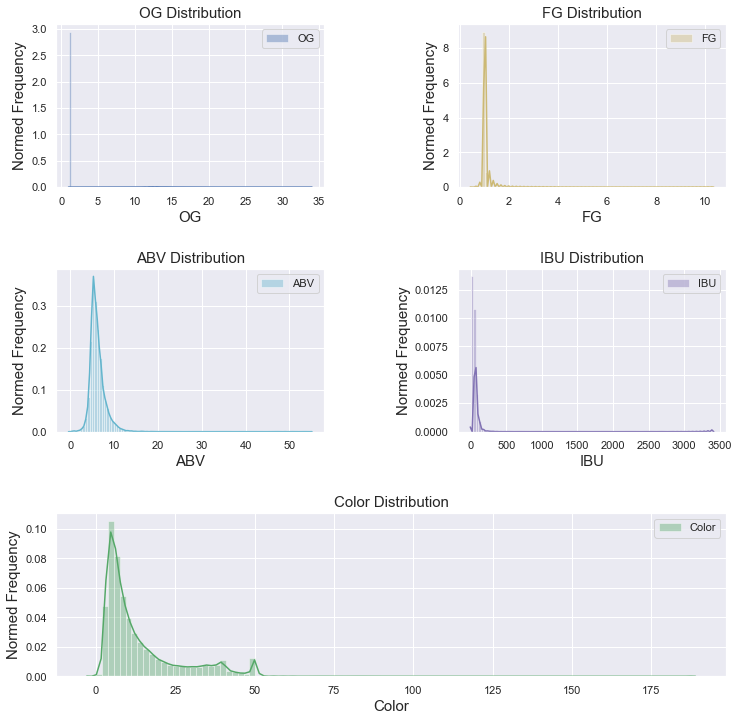

In [61]:
plt.figure(figsize=(12,12))
count=0
for col, color in zip(['OG', 'FG', 'ABV', 'IBU','Color'],['b','y','c','m','g']):
    count+=1
    if(count==5):
        plt.subplot(3,2,(5,6))
    else:
        plt.subplot(3,2,count)
    sns.distplot(df[col], bins=100, label=col, color=color)
    plt.title('{} Distribution'.format(col), fontsize=15)
    plt.legend()
    plt.ylabel('Normed Frequency', fontsize=15)
    plt.xlabel(col, fontsize=15)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

--------------------------------------------------------------------------------------

**Biểu đồ với log(x+1)**

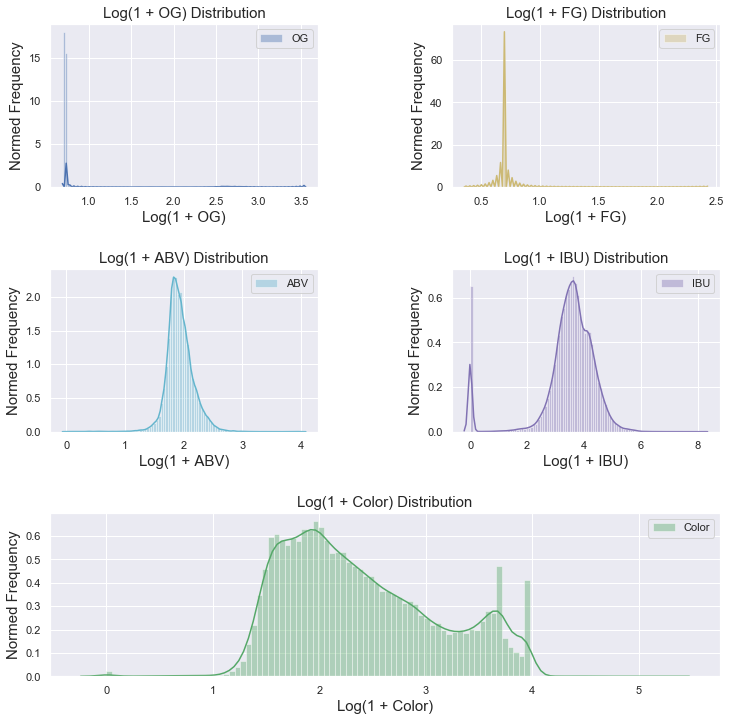

In [62]:
plt.figure(figsize=(12,12))
count=0
for col, color in zip(['OG', 'FG', 'ABV', 'IBU','Color'],['b','y','c','m','g']):
    count+=1
    if(count==5):
        plt.subplot(3,2,(5,6))
    else:
        plt.subplot(3,2,count)
    sns.distplot(np.log1p(df[col]), bins=100, label=col, color=color)
    plt.title('Log(1 + {}) Distribution'.format(col), fontsize=15)
    plt.legend()
    plt.ylabel('Normed Frequency', fontsize=15)
    plt.xlabel('Log(1 + {})'.format(col), fontsize=15)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

**ABV(Alcohol by volume)** *có phân phối tốt.*

**Color** *có phân phối tương tự như biểu đồ phân phối bình thường.*

*Nhưng có vẻ nó đã thoát khỏi giá trị tiêu cực.*

**IBU** *cho thấy có nhiều số 0 hơn sau khi biến đổi log.*

**Cần phân tích thêm.**

--------------------------------------------------------------------------------------

## b. ABV (Alcohol by volume)

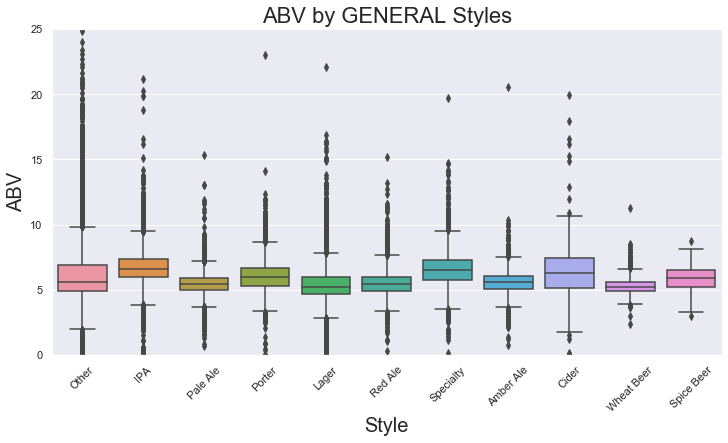

In [63]:
general_styles = ['Amber Ale','Pale Ale','Red Ale','Cider','Spice Beer',
                  'IPA','Lager','Specialty','Porter','Wheat Beer']
general_styles_dict = {'Brown':'Red','Fruit':'Spice', 'Stout':'Porter'}

df_general_styles = df.copy()
df_general_styles['Style_aux'] = 'Other'
for style in general_styles:
    df_general_styles.loc[df_general_styles['Style'].str.contains(style), 'Style_aux'] = style
for key in general_styles_dict:
    df_general_styles.loc[df_general_styles['Style'].str.contains('{} Ale'.format(key)), 'Style_aux'] = '{} Ale'.format(general_styles_dict[key])

plt.figure(figsize=(12,6))
sns.boxplot(df_general_styles['Style_aux'], df_general_styles['ABV'])
plt.xticks(rotation=45)
plt.ylim(0,25)
plt.title('ABV by GENERAL Styles', fontsize=22)
plt.xlabel('Style', fontsize=20)
plt.ylabel('ABV', fontsize=20)
plt.show()

## c. Color

**Biểu đồ mối liên hệ giữa Style và Color**

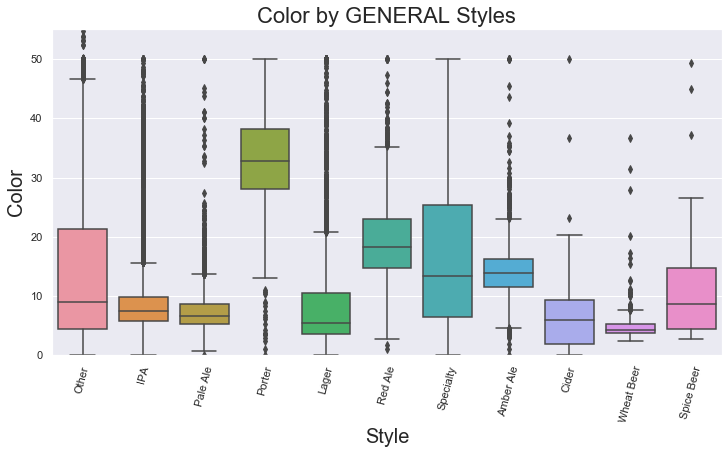

In [64]:
order = df_general_styles.groupby('Style_aux')['Color'].median().fillna(0).sort_values()[::-1].index

plt.figure(figsize=(12,6))
sns.boxplot(df_general_styles['Style_aux'], df_general_styles['Color'])
plt.xticks(rotation=75)
plt.ylim(0,55)
plt.title('Color by GENERAL Styles', fontsize=22)
plt.xlabel('Style', fontsize=20)
plt.ylabel('Color', fontsize=20)
plt.show()

**Ta thấy rằng Porter thật sự khó phân biệt bằng màu sắc so với các loại còn lại**

## d. Mối quan hệ giữa Color và ABV

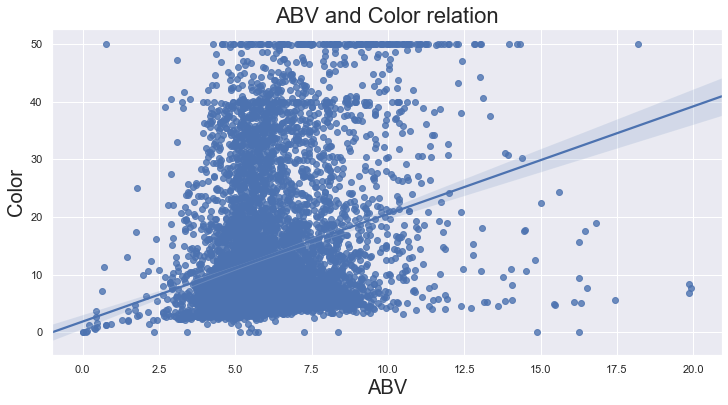

In [65]:
df_abv_color = df[(df['ABV']<=20) & (df['Color']<=50)]
df_abv_color = df_abv_color.sample(int(len(df_abv_color)/10), random_state=42)

plt.figure(figsize=(12,6))
sns.regplot(df_abv_color['ABV'],df_abv_color['Color'])
plt.title('ABV and Color relation', fontsize=22)
plt.xlabel('ABV', fontsize=20)
plt.ylabel('Color', fontsize=20)
plt.show();

*Ta thấy rằng khi* **đường hồi quy** 
*đi từ dưới trái tới trên phải ta có thể nói:* 
**các loại bia có nồng độ cồn cao thì màu sắc càng đậm** 
*(Nhưng đây không phải là xu hướng mạnh mẽ).*

## e. Các giá trị khác: OG, FG, IBU

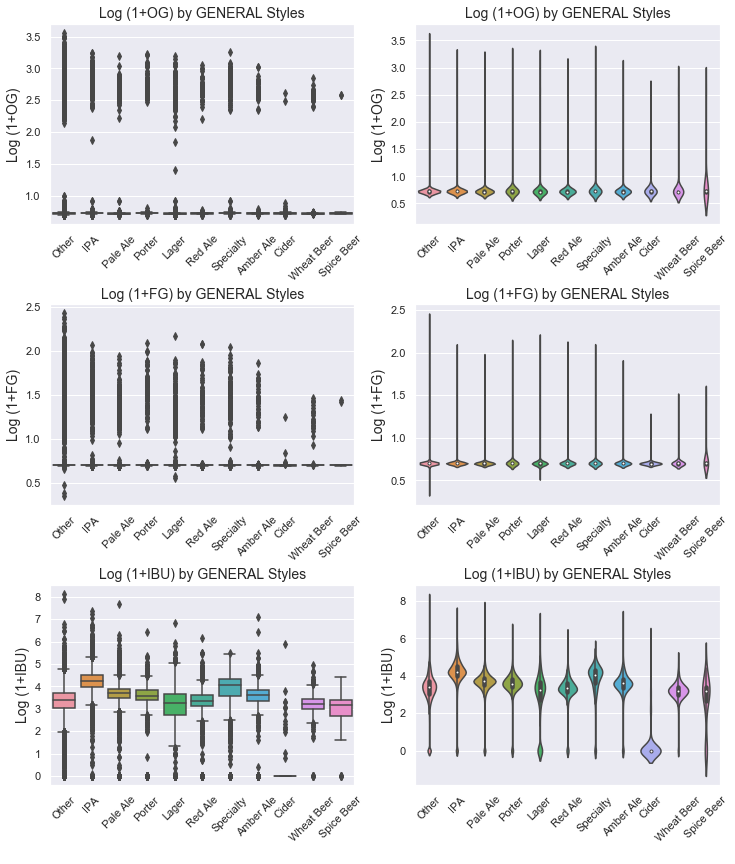

In [66]:
plt.figure(figsize=(12,14))
count=0    
for col in ['OG', 'FG', 'IBU']:
    for i in range(1,3):
        count+=1
        plt.subplot(3,2,count)

        if (i==1):
            sns.boxplot(df_general_styles['Style_aux'], np.log1p(df_general_styles[col]))
        else:
            sns.violinplot(df_general_styles['Style_aux'], np.log1p(df_general_styles[col]))
        plt.xticks(rotation=45)
        plt.title('Log (1+{}) by GENERAL Styles'.format(col), fontsize=14)
        plt.xlabel(' ')
        plt.ylabel('Log (1+{})'.format(col), fontsize=14)

plt.subplots_adjust(hspace=0.4)
plt.show();

Các giá trị của **OF** và **FG** tập trung ở một điểm cụ thể. Việc này làm cho **Boxplot** trở nên vô dụng. Vì thế ta sử dụng **Violinplot** để thể hiện sự tập trung của biểu đồ

# 5. Phân loại

## a Brew Method

No handles with labels found to put in legend.


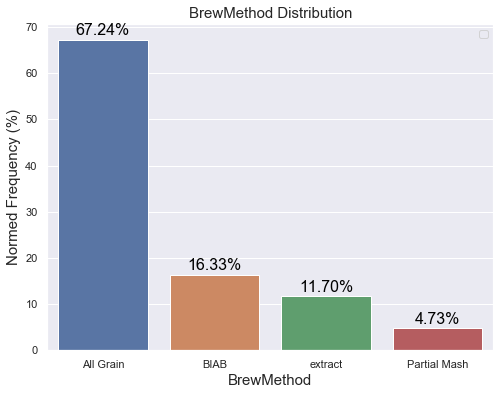

In [67]:
col= 'BrewMethod'
gb_brew_method = df.groupby([col]).count().sort_values(['BeerID'], ascending=False).reset_index()[:20]
gb_brew_method['BeerID'] = (gb_brew_method['BeerID'] / len(df)) * 100

plt.figure(figsize=(8,6))
g=sns.barplot(gb_brew_method[col], gb_brew_method['BeerID'])
plt.title('{} Distribution'.format(col), fontsize=15)
plt.legend()
plt.ylabel('Normed Frequency (%)', fontsize=15)
plt.xlabel(col, fontsize=15)

for index, row in gb_brew_method.iterrows():
    g.text(x=index,y=row['BeerID']+1,s='{:.2f}%'.format(row['BeerID']), 
           color='black', ha="center", fontsize=16)

plt.show()

## b. Sugar Scale

No handles with labels found to put in legend.


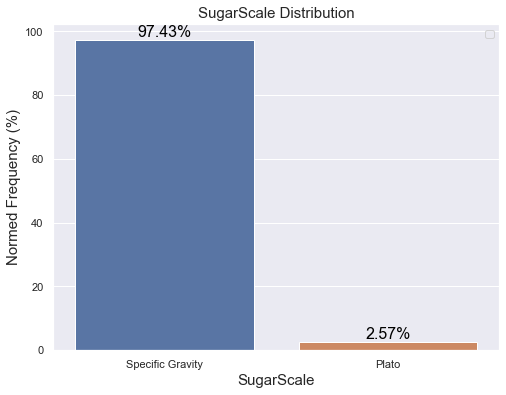

In [68]:
col = 'SugarScale'
gb_brew_method = df.groupby([col]).count().sort_values(['BeerID'], ascending=False).reset_index()[:20]
gb_brew_method['BeerID'] = (gb_brew_method['BeerID'] / len(df)) * 100

plt.figure(figsize=(8,6))
g=sns.barplot(gb_brew_method[col], gb_brew_method['BeerID'])
plt.title('{} Distribution'.format(col), fontsize=15)
plt.legend()
plt.ylabel('Normed Frequency (%)', fontsize=15)
plt.xlabel(col, fontsize=15)

for index, row in gb_brew_method.iterrows():
    g.text(x=index,y=row['BeerID']+1,s='{:.2f}%'.format(row['BeerID']), 
           color='black', ha="center", fontsize=16)

plt.show()
